<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span></div>

# Plotting (Need)
# 1 A simple plot
## 1.1 Let's look at some code.

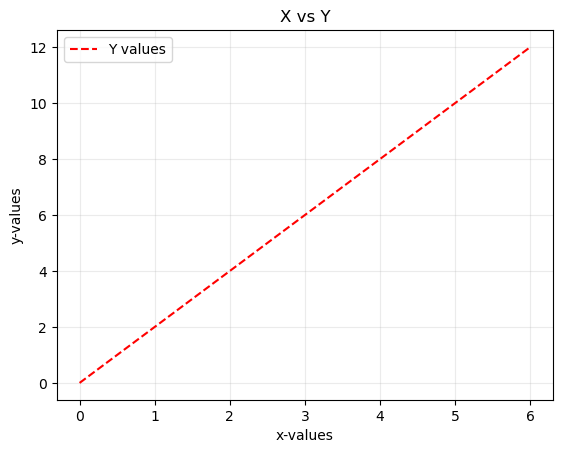

In [2]:
from matplotlib import pyplot as plt

# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]

# Let's start plotting
plt.plot(x, y_1, label='Y values',
         color='red', linestyle='dashed')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

### Things to note
1. You can use the following abbreviations if you like:

| **Long form** | **Abbreviation** |
|:-------------:|:----------------:|
|   ``color``   | ``c``            |
| ``linestyle`` | ``ls``           |
| ``linewidth`` | ``lw``           |

So
```python
plt.plot(x, y, color='red', linestyle='dashed', linewidth=2)
```
and
```python
plt.plot(x, y, c='red', ls='dashed', lw=2)
```
produce the same results.

1. ``plt.show()`` should also be inserted at the end of the code, so that it will work outside of interactive environments like Jupyter, e.g. in a CLI.
1. Plotting functions usually have default values for the styling parameters. So, if you wish, you can keep it simple and plot just using:
```python
plt.plot(x, y_1, y_2)
```

## 1.2 Adding another plot
You can plot two sets of data on one graph by adding another ``plot`` command.


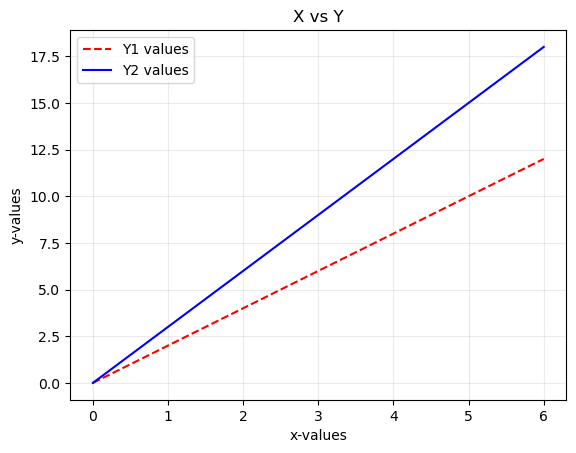

In [3]:
y_2 = [0, 3, 6, 9, 12, 15, 18]

plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed')
plt.plot(x, y_2, label='Y2 values', color='blue')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

## 1.3 Yet another plot but with error bars
You can also add error bars with ``errorbar()``.

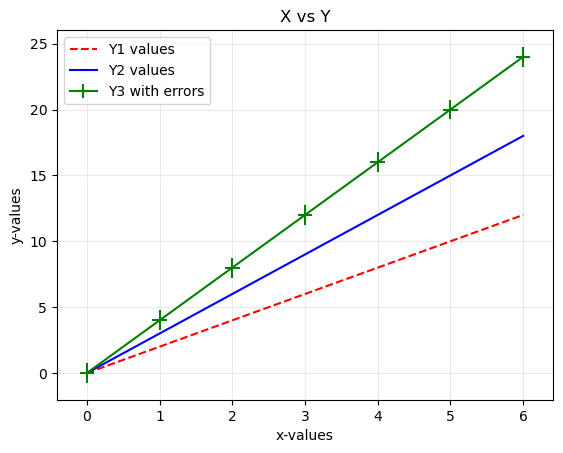

In [4]:
y_3 = [0, 4, 8, 12, 16, 20, 24]
x_error, y_error = .1, 0.75

plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed',)
plt.plot(x, y_2, label='Y2 values', color='blue', )
plt.errorbar(x, y_3, xerr=x_error, yerr=y_error,                        # uncertainty of x and y_3 are found in x_error and y_error
             label='Y3 with errors', color='green')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

# 2 Better with NumPy
Often, it is easier to use NumPy arrays instead of Python lists.
```python
# Some data for plotting
np_x = np.array(x)
np_y_1 = np.array(y_1)
np_y_2 = np.array(y_2)

plt.plot(np_x, np_y_1, color='red', linestyle='dashed', label='Y values')
plt.plot(np_x, np_y_2, color='blue', label='Y2 values')
```
## 2.1 Adding mathematical functions
One of the advantages of NumPy arrays is that they allow us to generate data-related mathematical functions easily. Let us plot $x^2$ and $\sin x$

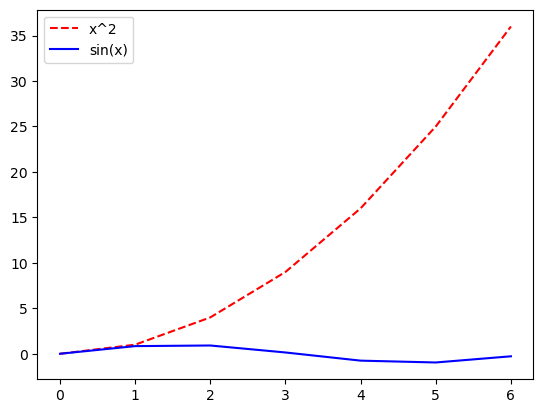

In [5]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6])

x2 = x**2                  # The math stuff
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',
         color='red', linestyle='dashed', )
plt.plot(x, sin_x, label='sin(x)',
         color='blue')
plt.legend()                                 

Alas, our plot does not look good because $\sin x$ lies between $\pm 1$, but $x^2$ has no such bounds. One way to fix this is to add another y-axis that shares the same x-axis.

## We need another axis!
Matplotlib offers a variety of ways to have multiple axes. The simplest way is to have another y-axis that shares the same x-axis. We can use the command ``twinx()`` for this.

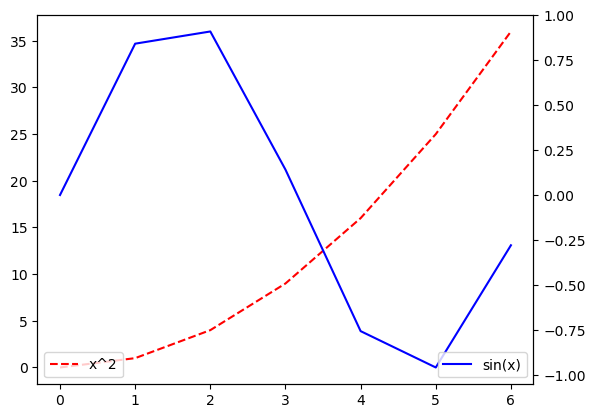

In [6]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',color='red', linestyle='dashed')
plt.legend(loc='lower left')                                  # For y-axis 1

plt.twinx()                                                   # This creates a new y-axis 
                                                              # for the plots that comes after
plt.plot(x, sin_x, label='sin(x)',color='blue', )
plt.legend(loc='lower right')                                 # For y-axis 2

Using ``np.linspace()``:

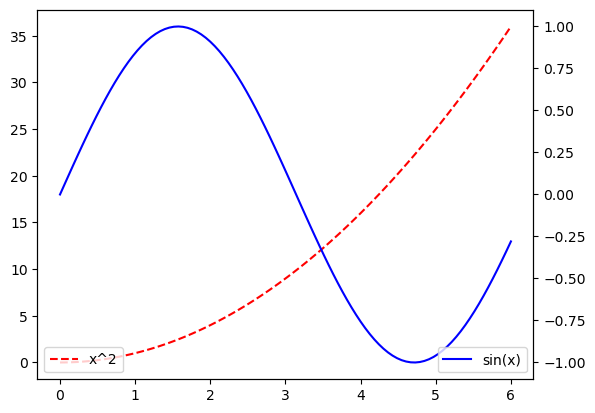

In [7]:
x = np.linspace(0, 6, 100)
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',color='red', linestyle='dashed')
plt.legend(loc='lower left')                                  # For y-axis 1

plt.twinx()                                                   # This creates a new y-axis 
                                                              # for the plots that comes after
plt.plot(x, sin_x, label='sin(x)',color='blue', )
plt.legend(loc='lower right')                                 # For y-axis 2

### Things to note
- We now have two ``legend()`` calls, one for each axis.
- ``linspace(x1,x2,n)`` returns $n$ evenly spaced points between $x_1$ and $x_2$. This makes the graph smoother, as we can easily add more points.

# 3 Saving to disc

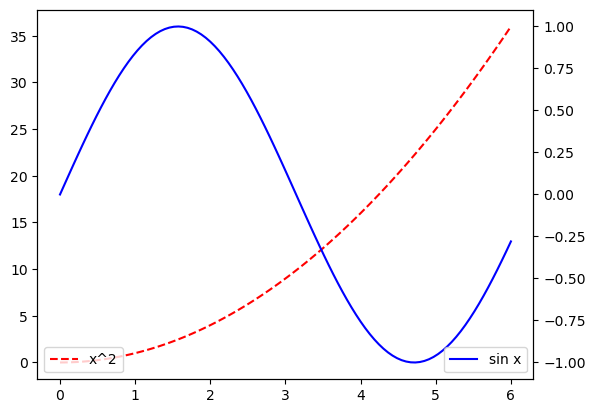

In [8]:
x = np.linspace(0, 6, 100)
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',
         color='red', linestyle='dashed')
plt.legend(loc='lower left')
plt.twinx()
plt.plot(x, sin_x,
         label='sin x', color='blue')
plt.legend(loc='lower right')

plt.savefig('simple-plot.png', dpi=150)

If you want to use your plot in a report or presentation, you must first save it to disk. 

To save a file, use ``savefig()``:
- We specify the format with the extension (e.g. ``filename.pdf``) of the file name,
- We specify resolution by use dots-per-inch (``dpi``).

When the code above is ran, you will find the file saved in the same directory as your coding file. If you want it saved elsewhere, specify the path in more detail. For example:
```python 
plt.savefig('~/Desktop/simple-plot.png', dpi=150)
```

# 4 A real example: Global Warming
## 4.1 Plotting data from files

(-4.0, 4.0)

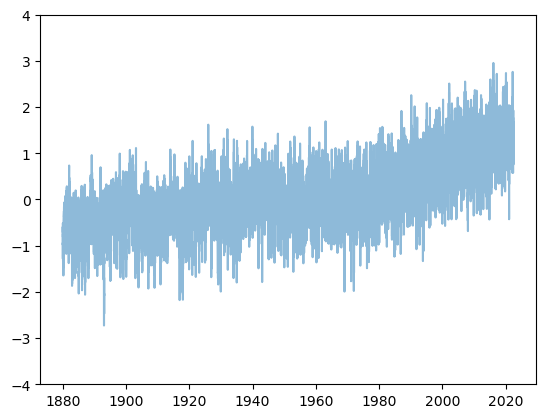

In [9]:
data = np.loadtxt('Complete_TAVG_daily.txt',
                   skiprows=24)
date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.ylim([-4, 4])

Let’s add a horizontal line at the zero value to highlight the trend shown by the data. <br>
The ``hlines()`` function needs a $y$-value and starting and ending values for $x$. 

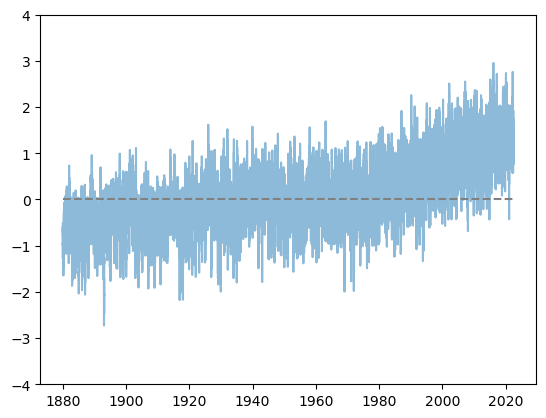

In [10]:
data = np.loadtxt('Complete_TAVG_daily.txt',
                   skiprows=24)
date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.ylim([-4, 4])

plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')

## 4.2 Styles
We can import styles from the [internet](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

If you do want to import a style, make sure to import it from the top.

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

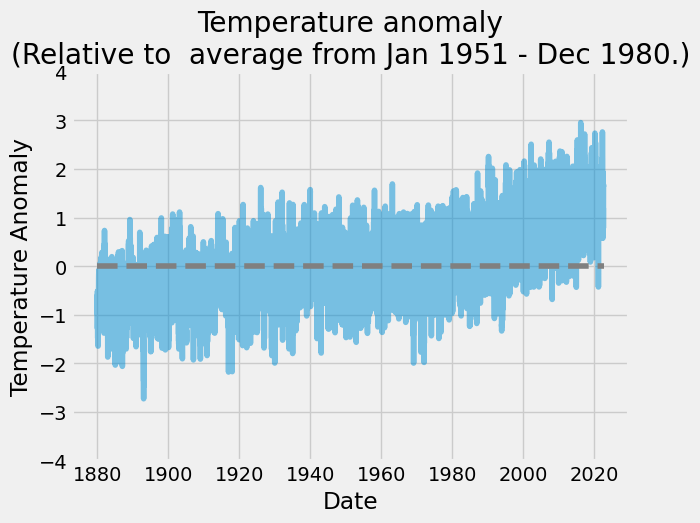

In [11]:
plt.style.use('fivethirtyeight')

plt.plot(date, anomaly, alpha=.5)
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')
plt.ylim([-4, 4])

plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

### Resetting styles
If you want to reset things and jump out of this style, you need to set the default style using:
```python
plt.style.use('default')
```